<a href="https://colab.research.google.com/github/shivams289/Projects/blob/main/Rev_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Basic Libraries Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

plt.rcParams["figure.figsize"] = (30,8)
plt.style.use('fivethirtyeight')
import math



from sklearn.metrics import mean_absolute_error

from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer


#Data Preprocessing

In [2]:
targ_col = ['target_total_revenues']

In [3]:
df = pd.read_parquet('/content/drive/MyDrive/brook_mvp_train_deputed_total_revenues_abt.parquet')

In [4]:
df.shape

(21317, 721)

In [5]:
set(df.dtypes)

{dtype('float64'), dtype('int64'), StringDtype}

In [6]:
# 718 columns are numeric 
df.select_dtypes(exclude=['float64', 'int64']).columns

Index(['state', 'city', 'reporting_template_type_name'], dtype='object')

In [7]:
df.drop(['state', 'city'], axis =1 , inplace = True)

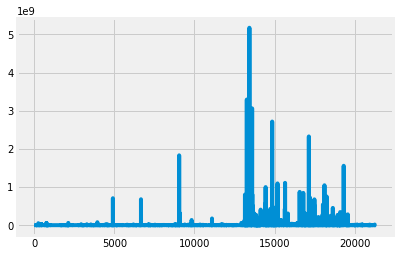

In [8]:
plt.plot(df['target_total_revenues'])

In [9]:
#number of unique Company id
len(set(df['masked_company_id']))

9761

In [10]:
df.loc[~df['m1_total_revenues'].isna(), ['masked_company_id']].value_counts()

masked_company_id
2812                 2
4838                 2
2859                 1
2938                 1
3909                 1
                    ..
7330                 1
7308                 1
7281                 1
7201                 1
16                   1
Length: 241, dtype: int64

In [11]:
#See if same company has different target years
df[df['masked_company_id'] == 5021]

,masked_company_id,year_founded,num_employees,reporting_template_type_name,mode_period_end_month,m8_accounts_payable_total,m8_accounts_receivable_long_term,m8_accounts_receivable_total,m8_accrued_expenses_total,m8_common_stock_total,m8_comprehensive_income_and_other_reported_private_only,m8_current_assets_per_total_assets,m8_current_income_taxes_payable,m8_current_portion_of_leases,m8_current_ratio,m8_deferred_tax_liability_non_current,m8_inventory,m8_inventory_per_current_assets,m8_lt_debt_per_equity,m8_long_term_debt,m8_long_term_debt_per_total_capital,m8_long_term_leases,m8_minority_interests_reported_private_only,m8_net_working_capital_per_total_assets,m8_other_current_assets_reported_private_only,m8_other_current_liabilities,m8_other_current_liabilities_reported_private_only,m8_other_intangibles_total,m8_other_non_current_liabilities,m8_other_non_current_liabilities_reported_private_only,m8_other_receivables,m8_preferred_stock_others,m8_provision_for_pension_reported_private_only,m8_retained_earnings,m8_short_term_borrowings,m8_total_cash_and_short_term_investments,m8_total_debt_per_total_liabilities_pct,m8_total_debt_to_capital_pct,m8_total_debt_per_equity,m8_total_tangible_fixed_assets_reported_private_only,...,m1_edlb,m1_edma,m1_edld,m1_edls,m1_edkv,m1_idob,m1_je2j,m1_idoh,m1_iefq,m1_kp8d,m1_jo4x,m1_jo6b,m1_iefb,m1_iebm,m1_jo4w,m1_ieau,m1_idik,m1_jo4t,m1_kp8i,m1_kp8j,m1_j45s,m1_k5hu,m1_d7gj,m1_d7gh,m1_d7gg,m1_d7gf,m1_d7gc,m1_d7gb,m1_d7ga,m1_d7g9,m1_dkl3,m1_dkl5,m1_dkk4,m1_dkn3,m1_dkn5,m1_dkn8,m1_dkm7,m1_e8pu,target_year,target_total_revenues
21313,5021,1986.0,27.0,,3,0.0,0.0,0.0,0.0,0.0,0.0,0.646510,84.0,0.0,1.330619,0.0,6424.0,0.054989,18.486870,14495.0,13.737123,0.0,0.0,-0.328841,0.0,75097.0,75097.0,0.0,0.0,0.0,9336.0,0.0,0.0,78407.0,12615.0,101063.0,26.502820,25.692542,34.575994,63875.0,...,-1.666667e-03,0.041667,0.000833,0.032500,-0.018333,2.775000,1029.550000,2.708333,-0.925000,15.966667,6.225000,3.658333,2.591667,1.458333,3.300000,1.725000,0.016667,17.000000,9.983333,34.033333,3.683333,18.416667,1.108333,4.641667,0.775000,2.833333,0.083333,0.275000,0.041667,2.00,-0.933333,1.108333,-0.616667,1.333333,3.716667,1.250000,-3.583333,0.150000,2018,581299.0
21314,5021,1986.0,27.0,,3,104.0,0.0,0.0,0.0,0.0,0.0,0.631586,621.0,0.0,1.867830,0.0,6679.0,0.076537,4.025754,3539.0,3.453289,0.0,0.0,-0.130718,0.0,34961.0,34961.0,0.0,0.0,0.0,10946.0,0.0,0.0,87909.0,11034.0,69640.0,28.995802,14.220058,16.577370,50903.0,...,3.320000e-18,-0.003333,0.000833,-0.121667,-0.010000,0.158333,1187.616667,0.458333,2.808333,11.450000,-12.091667,8.541667,0.375000,2.866667,-5.008333,2.450000,4.741667,16.008333,17.783333,17.883333,2.383333,19.416667,1.175000,3.433333,2.391667,1.225000,3.116667,2.141667,3.200000,4.80,3.916667,4.891667,2.958333,2.333333,5.241667,3.516667,0.833333,0.016667,2019,556601.0
21315,5021,1986.0,27.0,,3,28871.0,0.0,0.0,0.0,0.0,0.0,0.653171,84.0,0.0,1.255265,0.0,4978.0,0.042738,7.711875,6124.0,6.318678,0.0,0.0,-0.272207,0.0,52450.0,52450.0,0.0,0.0,0.0,27886.0,0.0,0.0,79410.0,11385.0,83612.0,17.701235,18.065601,22.048860,61848.0,...,3.333333e-03,0.017500,0.000833,-0.065833,0.003333,1.175000,1356.700000,2.150000,0.583333,7.333333,-2.075000,8.408333,1.100000,3.333333,8.566667,3.316667,1.333333,11.608333,14.483333,18.191667,2.566667,19.000000,-0.058333,2.958333,2.950000,1.833333,1.083333,2.083333,-0.391667,4.35,2.275000,6.316667,1.775000,2.675000,3.425000,3.933333,-1.458333,-0.050000,2020,562695.0


In [12]:
# % of this column that is missing 
df['m8_total_debt_per_total_liabilities_pct'].isnull().mean()*100

44.87029131678942

In [13]:
#columns having greater than 50% of the values as NUll
def find_null_columns(df):
  null_cols = {'col_name':[], 'Null%':[]}
  for col in df.columns:
    null_count = df[col].isnull().sum()
    perc_null = null_count/len(df)
    if perc_null >=0.45:
      null_cols['col_name'].append(col)
      null_cols['Null%'].append(perc_null)
  null_df = pd.DataFrame(null_cols)

  return null_df

#cols having 0 null values
def non_null_columns(df):
  non_null_cols = []
  for col in df.columns:
    null_count = df[col].isnull().sum()
    if null_count == 0:
      non_null_cols.append(col)

  return non_null_cols

#cols having 0 null values
def less_null_columns(df):
  less_null_cols = []
  for col in df.columns:
    null_count = df[col].isnull().sum()
    if null_count <=7000:
      less_null_cols.append(col)

  return less_null_cols

In [14]:
less_null_lst_excl_non_null = list(set(less_null_columns(df)) - set(non_null_columns(df)))

#FEATURES WITH LESS THAN 7K NULL VALUES

In [15]:
#less_null_lst_excl_non_null

In [16]:
less_null_columns_list = less_null_columns(df)

In [17]:
non_n = df[less_null_columns_list].dropna(axis = 0)

In [18]:
len(set(non_n['masked_company_id']))


4903

In [19]:
non_n.isnull().sum()

masked_company_id               0
year_founded                    0
reporting_template_type_name    0
mode_period_end_month           0
m8_edlp                         0
                               ..
m1_dkn8                         0
m1_dkm7                         0
m1_e8pu                         0
target_year                     0
target_total_revenues           0
Length: 599, dtype: int64

In [20]:
non_n.head()

,masked_company_id,year_founded,reporting_template_type_name,mode_period_end_month,m8_edlp,m8_edks,m8_eczt,m8_edlo,m8_edkr,m8_edlr,m8_edku,m8_edly,m8_edlb,m8_edma,m8_edld,m8_edls,m8_edkv,m8_idob,m8_je2j,m8_idoh,m8_iefq,m8_kp8d,m8_jo4x,m8_jo6b,m8_iefb,m8_iebm,m8_jo4w,m8_ieau,m8_idik,m8_jo4t,m8_kp8i,m8_kp8j,m8_j45s,m8_k5hu,m8_d7gj,m8_d7gh,m8_d7gg,m8_d7gf,m8_d7gc,m8_d7gb,...,m1_edlb,m1_edma,m1_edld,m1_edls,m1_edkv,m1_idob,m1_je2j,m1_idoh,m1_iefq,m1_kp8d,m1_jo4x,m1_jo6b,m1_iefb,m1_iebm,m1_jo4w,m1_ieau,m1_idik,m1_jo4t,m1_kp8i,m1_kp8j,m1_j45s,m1_k5hu,m1_d7gj,m1_d7gh,m1_d7gg,m1_d7gf,m1_d7gc,m1_d7gb,m1_d7ga,m1_d7g9,m1_dkl3,m1_dkl5,m1_dkk4,m1_dkn3,m1_dkn5,m1_dkn8,m1_dkm7,m1_e8pu,target_year,target_total_revenues
1,5024,2009.0,,3,-0.085000,0.003333,0.175000,-0.347500,0.000833,-0.208333,-0.063333,-0.052500,5.000000e-03,-0.009167,0.005000,0.201667,0.021667,-0.450000,361.750000,-6.233333,6.033333,27.550000,-18.191667,-7.041667,-0.400000,-5.241667,-2.241667,4.208333,1.650000,8.808333,30.166667,22.608333,0.058333,21.416667,1.841667,6.866667,1.933333,2.383333,3.425000,1.666667,...,-1.666667e-03,0.041667,0.000833,0.032500,-0.018333,2.775000,1029.550000,2.708333,-0.925000,15.966667,6.225000,3.658333,2.591667,1.458333,3.300000,1.725000,0.016667,17.000000,9.983333,34.033333,3.683333,18.416667,1.108333,4.641667,0.775000,2.833333,0.083333,0.275000,0.041667,2.000000,-0.933333,1.108333,-0.616667,1.333333,3.716667,1.250000,-3.583333,0.150000,2018,96321.0
2,5025,1960.0,Standard,3,-0.085000,0.003333,0.175000,-0.347500,0.000833,-0.208333,-0.063333,-0.052500,5.000000e-03,-0.009167,0.005000,0.201667,0.021667,-0.450000,361.750000,-6.233333,6.033333,27.550000,-18.191667,-7.041667,-0.400000,-5.241667,-2.241667,4.208333,1.650000,8.808333,30.166667,22.608333,0.058333,21.416667,1.841667,6.866667,1.933333,2.383333,3.425000,1.666667,...,-1.666667e-03,0.041667,0.000833,0.032500,-0.018333,2.775000,1029.550000,2.708333,-0.925000,15.966667,6.225000,3.658333,2.591667,1.458333,3.300000,1.725000,0.016667,17.000000,9.983333,34.033333,3.683333,18.416667,1.108333,4.641667,0.775000,2.833333,0.083333,0.275000,0.041667,2.000000,-0.933333,1.108333,-0.616667,1.333333,3.716667,1.250000,-3.583333,0.150000,2018,97461.0
3,5025,1960.0,Standard,3,0.061667,-0.001667,-0.091667,0.098333,0.017500,-0.398333,0.005833,0.044167,1.666667e-03,0.039167,0.001667,0.465833,0.029167,-1.233333,425.266667,-5.975000,4.433333,19.750000,-16.175000,8.483333,-1.225000,-2.383333,-3.450000,2.550000,5.458333,9.825000,28.458333,-3.358333,0.066667,21.833333,2.583333,5.350000,1.425000,4.791667,3.116667,1.191667,...,3.320000e-18,-0.003333,0.000833,-0.121667,-0.010000,0.158333,1187.616667,0.458333,2.808333,11.450000,-12.091667,8.541667,0.375000,2.866667,-5.008333,2.450000,4.741667,16.008333,17.783333,17.883333,2.383333,19.416667,1.175000,3.433333,2.391667,1.225000,3.116667,2.141667,3.200000,4.800000,3.916667,4.891667,2.958333,2.333333,5.241667,3.516667,0.833333,0.016667,2019,95291.0
4,5025,1960.0,Standard,3,0.095833,0.015833,0.658333,0.082500,-0.001667,-0.005833,-0.015833,0.012500,2.890000e-19,-0.006667,-0.000833,0.165833,0.034167,-1.833333,502.433333,-3.758333,0.233333,8.541667,-6.433333,12.641667,-1.666667,-2.558333,-3.208333,3.525000,1.758333,14.125000,29.050000,-5.325000,-0.541667,22.083333,2.600000,5.141667,-0.333333,4.150000,4.816667,6.491667,...,3.333333e-03,0.017500,0.000833,-0.065833,0.003333,1.175000,1356.700000,2.150000,0.583333,7.333333,-2.075000,8.408333,1.100000,3.333333,8.566667,3.316667,1.333333,11.608333,14.483333,18.191667,2.566667,19.000000,-0.058333,2.958333,2.950000,1.833333,1.083333,2.083333,-0.391667,4.350000,2.275000,6.316667,1.775000,2.675000,3.425000,3.933333,-1.458333,-0.050000,2020,93056.0
11,5031,2004.0,Standard,4,-0.070000,0.004167,0.225000,-0.284167,0.004167,-0.325833,-0.070000,-0.046667,-5.000000e-03,-0.006667,0.004167,0.207500,0.022500,-0.333333,366.225000,-5.491667,5.883333,28.816667,-19.000000,-5.333333,-0.100000,-4.783333,-2.758333,4.041667,2.416667,10.125000,28.316667,22.083333

In [21]:
#find_null_columns(df)

In [22]:
#No. of columns having 0 null values
print('Non-null cols:',len(non_null_columns(df)))
print('Atleast_one_null cols:',df.shape[1]-len(non_null_columns(df)))

Non-null cols: 373
Atleast_one_null cols: 346


In [23]:
#df.loc[~(df['m1_total_revenues'].isna()), ['masked_company_id', 'm1_total_revenues', 'year_founded', 'target_year', 'target_total_revenues']]

In [24]:
#Conclusion: Macro Variables left out, Everyone has null values except the target variable
#non_null_columns(df)

In [25]:
#Conclusion - Aproxx . 50% of this variable is empty so we should drop it, I don't this will be useful in our prediction

#main_df[main_df['reporting_template_type_name'] == '']

In [26]:
from sklearn.metrics import r2_score

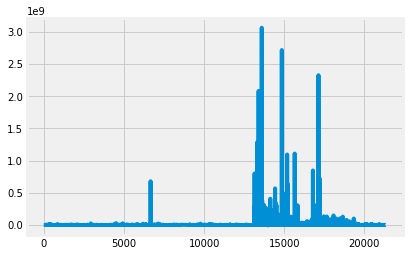

In [27]:
# Our pattern of data is still there
plt.plot(non_n['target_total_revenues'])

In [28]:
non_n.columns

Index(['masked_company_id', 'year_founded', 'reporting_template_type_name',
       'mode_period_end_month', 'm8_edlp', 'm8_edks', 'm8_eczt', 'm8_edlo',
       'm8_edkr', 'm8_edlr',
       ...
       'm1_dkl3', 'm1_dkl5', 'm1_dkk4', 'm1_dkn3', 'm1_dkn5', 'm1_dkn8',
       'm1_dkm7', 'm1_e8pu', 'target_year', 'target_total_revenues'],
      dtype='object', length=599)

In [29]:
year_diff = non_n['target_year'] - non_n['year_founded']

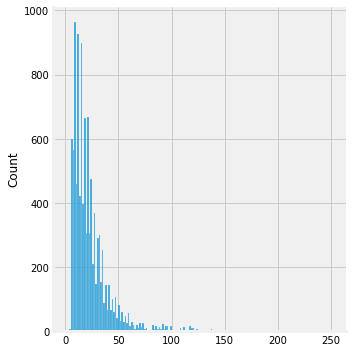

In [30]:
sns.displot((year_diff))

In [31]:
non_n['yf_t_diff'] = year_diff

In [32]:
non_n['mode_period_end_month'].value_counts()

3     3760
12    2931
9      764
6      569
8      504
4      494
10     466
7      446
1      302
5      300
2      276
11     250
Name: mode_period_end_month, dtype: int64

In [33]:
ohe_data = pd.get_dummies(non_n, columns = ['reporting_template_type_name','mode_period_end_month'])

In [34]:
ohe_data.columns


Index(['masked_company_id', 'year_founded', 'm8_edlp', 'm8_edks', 'm8_eczt',
       'm8_edlo', 'm8_edkr', 'm8_edlr', 'm8_edku', 'm8_edly',
       ...
       'mode_period_end_month_3', 'mode_period_end_month_4',
       'mode_period_end_month_5', 'mode_period_end_month_6',
       'mode_period_end_month_7', 'mode_period_end_month_8',
       'mode_period_end_month_9', 'mode_period_end_month_10',
       'mode_period_end_month_11', 'mode_period_end_month_12'],
      dtype='object', length=612)

In [35]:
ohe_data.drop(['year_founded', 'target_year', 'masked_company_id'], axis =1 , inplace =True)

In [36]:
ohe_data.isna().mean()

m8_edlp                     0.0
m8_edks                     0.0
m8_eczt                     0.0
m8_edlo                     0.0
m8_edkr                     0.0
                           ... 
mode_period_end_month_8     0.0
mode_period_end_month_9     0.0
mode_period_end_month_10    0.0
mode_period_end_month_11    0.0
mode_period_end_month_12    0.0
Length: 609, dtype: float64

In [37]:
m1_tax_expense0 = ohe_data['m1_current_income_taxes_payable'] + (ohe_data['m1_deferred_tax_liability_non_current'] - ohe_data['m2_deferred_tax_liability_non_current'])


m2_tax_expense0 = ohe_data['m2_current_income_taxes_payable'] + (ohe_data['m2_deferred_tax_liability_non_current'] - ohe_data['m3_deferred_tax_liability_non_current'])



m3_tax_expense0 = ohe_data['m3_current_income_taxes_payable'] + (ohe_data['m3_deferred_tax_liability_non_current'] - ohe_data['m4_deferred_tax_liability_non_current'])



m4_tax_expense0 = ohe_data['m4_current_income_taxes_payable'] + (ohe_data['m4_deferred_tax_liability_non_current'] - ohe_data['m5_deferred_tax_liability_non_current'])



In [38]:
ohe_data['m1_tax_expense'] = m1_tax_expense0
ohe_data['m2_tax_expense'] = m2_tax_expense0
ohe_data['m3_tax_expense'] = m3_tax_expense0
ohe_data['m4_tax_expense'] = m4_tax_expense0


In [39]:
m1_cash_received0 = ohe_data['m2_accounts_receivable_total'] - ohe_data['m1_accounts_receivable_total']

m2_cash_received0 = ohe_data['m3_accounts_receivable_total'] - ohe_data['m2_accounts_receivable_total']

m3_cash_received0 = ohe_data['m4_accounts_receivable_total'] - ohe_data['m3_accounts_receivable_total']

m4_cash_received0 = ohe_data['m5_accounts_receivable_total'] - ohe_data['m4_accounts_receivable_total']

m5_cash_received0 = ohe_data['m6_accounts_receivable_total'] - ohe_data['m5_accounts_receivable_total']





In [40]:
m1_cash_paid0 = (ohe_data['m2_accounts_payable_total'] - ohe_data['m1_accounts_payable_total']) + (ohe_data['m1_inventory'] - ohe_data['m2_inventory'])

m2_cash_paid0 = (ohe_data['m3_accounts_payable_total'] - ohe_data['m2_accounts_payable_total']) + (ohe_data['m2_inventory'] - ohe_data['m3_inventory'])

m3_cash_paid0 = (ohe_data['m4_accounts_payable_total'] - ohe_data['m3_accounts_payable_total']) + (ohe_data['m3_inventory'] - ohe_data['m4_inventory'])

m4_cash_paid0 = (ohe_data['m5_accounts_payable_total'] - ohe_data['m4_accounts_payable_total']) + (ohe_data['m4_inventory'] - ohe_data['m5_inventory'])

m5_cash_paid0 = (ohe_data['m6_accounts_payable_total'] - ohe_data['m5_accounts_payable_total']) + (ohe_data['m5_inventory'] - ohe_data['m6_inventory'])


In [41]:
ohe_data['m1_cash_received'] = m1_cash_received0
ohe_data['m2_cash_received'] = m2_cash_received0
ohe_data['m3_cash_received'] = m3_cash_received0
ohe_data['m4_cash_received'] = m4_cash_received0
ohe_data['m5_cash_received'] = m5_cash_received0


ohe_data['m1_cash_paid'] = m1_cash_paid0
ohe_data['m2_cash_paid'] = m2_cash_paid0
ohe_data['m3_cash_paid'] = m3_cash_paid0
ohe_data['m4_cash_paid'] = m4_cash_paid0
ohe_data['m5_cash_paid'] = m5_cash_paid0



ohe_data['m1_CFO_partial'] = m1_cash_received0 - m1_cash_paid0
ohe_data['m2_CFO_partial'] = m2_cash_received0 - m2_cash_paid0
ohe_data['m3_CFO_partial'] = m3_cash_received0 - m3_cash_paid0
ohe_data['m4_CFO_partial'] = m4_cash_received0 - m4_cash_paid0
ohe_data['m5_CFO_partial'] = m5_cash_received0 - m5_cash_paid0


In [42]:
target = ['target_total_revenues']
features = list(set(ohe_data.columns) - set(target))


#FEATURES WITH LESS THAN 10K NULL VALUES

In [43]:
#non_null_columns(df)

In [44]:
#cols having less than 10,000 null values
def less10k_null_columns(df):
  less_null_cols = []
  for col in df.columns:
    null_count = df[col].isnull().sum()
    if null_count <=10000:
      less_null_cols.append(col)

  return less_null_cols

In [45]:
non_n_less10k_df = df[less10k_null_columns(df)].dropna(axis = 0)

In [46]:
#non_n_less10k_df

In [47]:
year_diff2 = non_n_less10k_df['target_year'] - non_n_less10k_df['year_founded']

In [48]:
non_n_less10k_df['yf_t_diff'] = year_diff2

In [49]:
non_n_less10k_df.drop(['year_founded', 'target_year', 'masked_company_id'], axis =1 , inplace =True)

In [50]:
less_than10k_one_hot_encoded_data = pd.get_dummies(non_n_less10k_df, columns = ['reporting_template_type_name', 'mode_period_end_month'])

In [51]:


m1_tax_expense = less_than10k_one_hot_encoded_data['m1_current_income_taxes_payable'] + (less_than10k_one_hot_encoded_data['m1_deferred_tax_liability_non_current'] - less_than10k_one_hot_encoded_data['m2_deferred_tax_liability_non_current'])



m2_tax_expense = less_than10k_one_hot_encoded_data['m2_current_income_taxes_payable'] + (less_than10k_one_hot_encoded_data['m2_deferred_tax_liability_non_current'] - less_than10k_one_hot_encoded_data['m3_deferred_tax_liability_non_current'])



m3_tax_expense = less_than10k_one_hot_encoded_data['m3_current_income_taxes_payable'] + (less_than10k_one_hot_encoded_data['m3_deferred_tax_liability_non_current'] - less_than10k_one_hot_encoded_data['m4_deferred_tax_liability_non_current'])



m4_tax_expense = less_than10k_one_hot_encoded_data['m4_current_income_taxes_payable'] + (less_than10k_one_hot_encoded_data['m4_deferred_tax_liability_non_current'] - less_than10k_one_hot_encoded_data['m5_deferred_tax_liability_non_current'])



m5_tax_expense = less_than10k_one_hot_encoded_data['m5_current_income_taxes_payable'] + (less_than10k_one_hot_encoded_data['m5_deferred_tax_liability_non_current'] - less_than10k_one_hot_encoded_data['m6_deferred_tax_liability_non_current'])



m6_tax_expense = less_than10k_one_hot_encoded_data['m6_current_income_taxes_payable'] + (less_than10k_one_hot_encoded_data['m6_deferred_tax_liability_non_current'] - less_than10k_one_hot_encoded_data['m7_deferred_tax_liability_non_current'])

m7_tax_expense = less_than10k_one_hot_encoded_data['m7_current_income_taxes_payable'] + (less_than10k_one_hot_encoded_data['m7_deferred_tax_liability_non_current'] - less_than10k_one_hot_encoded_data['m8_deferred_tax_liability_non_current'])



In [52]:
less_than10k_one_hot_encoded_data['m1_tax_expense'] = m1_tax_expense
less_than10k_one_hot_encoded_data['m2_tax_expense'] = m2_tax_expense
less_than10k_one_hot_encoded_data['m3_tax_expense'] = m3_tax_expense
less_than10k_one_hot_encoded_data['m4_tax_expense'] = m4_tax_expense
less_than10k_one_hot_encoded_data['m5_tax_expense'] = m5_tax_expense
less_than10k_one_hot_encoded_data['m6_tax_expense'] = m6_tax_expense
less_than10k_one_hot_encoded_data['m7_tax_expense'] = m7_tax_expense

In [53]:

m1_cash_received = less_than10k_one_hot_encoded_data['m2_accounts_receivable_total'] - less_than10k_one_hot_encoded_data['m1_accounts_receivable_total']

m2_cash_received = less_than10k_one_hot_encoded_data['m3_accounts_receivable_total'] - less_than10k_one_hot_encoded_data['m2_accounts_receivable_total']

m3_cash_received = less_than10k_one_hot_encoded_data['m4_accounts_receivable_total'] - less_than10k_one_hot_encoded_data['m3_accounts_receivable_total']

m4_cash_received = less_than10k_one_hot_encoded_data['m5_accounts_receivable_total'] - less_than10k_one_hot_encoded_data['m4_accounts_receivable_total']

m5_cash_received = less_than10k_one_hot_encoded_data['m6_accounts_receivable_total'] - less_than10k_one_hot_encoded_data['m5_accounts_receivable_total']

m6_cash_received = less_than10k_one_hot_encoded_data['m7_accounts_receivable_total'] - less_than10k_one_hot_encoded_data['m6_accounts_receivable_total']

m7_cash_received = less_than10k_one_hot_encoded_data['m8_accounts_receivable_total'] - less_than10k_one_hot_encoded_data['m7_accounts_receivable_total']



m1_cash_paid = (less_than10k_one_hot_encoded_data['m2_accounts_payable_total'] - less_than10k_one_hot_encoded_data['m1_accounts_payable_total']) + (less_than10k_one_hot_encoded_data['m1_inventory'] - less_than10k_one_hot_encoded_data['m2_inventory'])

m2_cash_paid = (less_than10k_one_hot_encoded_data['m3_accounts_payable_total'] - less_than10k_one_hot_encoded_data['m2_accounts_payable_total']) + (less_than10k_one_hot_encoded_data['m2_inventory'] - less_than10k_one_hot_encoded_data['m3_inventory'])

m3_cash_paid = (less_than10k_one_hot_encoded_data['m4_accounts_payable_total'] - less_than10k_one_hot_encoded_data['m3_accounts_payable_total']) + (less_than10k_one_hot_encoded_data['m3_inventory'] - less_than10k_one_hot_encoded_data['m4_inventory'])

m4_cash_paid = (less_than10k_one_hot_encoded_data['m5_accounts_payable_total'] - less_than10k_one_hot_encoded_data['m4_accounts_payable_total']) + (less_than10k_one_hot_encoded_data['m4_inventory'] - less_than10k_one_hot_encoded_data['m5_inventory'])

m5_cash_paid = (less_than10k_one_hot_encoded_data['m6_accounts_payable_total'] - less_than10k_one_hot_encoded_data['m5_accounts_payable_total']) + (less_than10k_one_hot_encoded_data['m5_inventory'] - less_than10k_one_hot_encoded_data['m6_inventory'])

m6_cash_paid = (less_than10k_one_hot_encoded_data['m7_accounts_payable_total'] - less_than10k_one_hot_encoded_data['m6_accounts_payable_total']) + (less_than10k_one_hot_encoded_data['m6_inventory'] - less_than10k_one_hot_encoded_data['m7_inventory'])

m7_cash_paid = (less_than10k_one_hot_encoded_data['m8_accounts_payable_total'] - less_than10k_one_hot_encoded_data['m7_accounts_payable_total']) + (less_than10k_one_hot_encoded_data['m7_inventory'] - less_than10k_one_hot_encoded_data['m8_inventory'])

In [54]:
less_than10k_one_hot_encoded_data['m1_cash_received'] = m1_cash_received
less_than10k_one_hot_encoded_data['m2_cash_received'] = m2_cash_received
less_than10k_one_hot_encoded_data['m3_cash_received'] = m3_cash_received
less_than10k_one_hot_encoded_data['m4_cash_received'] = m4_cash_received
less_than10k_one_hot_encoded_data['m5_cash_received'] = m5_cash_received
less_than10k_one_hot_encoded_data['m6_cash_received'] = m6_cash_received
less_than10k_one_hot_encoded_data['m7_cash_received'] = m7_cash_received

less_than10k_one_hot_encoded_data['m1_cash_paid'] = m1_cash_paid
less_than10k_one_hot_encoded_data['m2_cash_paid'] = m2_cash_paid
less_than10k_one_hot_encoded_data['m3_cash_paid'] = m3_cash_paid
less_than10k_one_hot_encoded_data['m4_cash_paid'] = m4_cash_paid
less_than10k_one_hot_encoded_data['m5_cash_paid'] = m5_cash_paid
less_than10k_one_hot_encoded_data['m6_cash_paid'] = m6_cash_paid
less_than10k_one_hot_encoded_data['m7_cash_paid'] = m7_cash_paid


less_than10k_one_hot_encoded_data['m1_CFO_partial'] = m1_cash_received - m1_cash_paid
less_than10k_one_hot_encoded_data['m2_CFO_partial'] = m2_cash_received - m2_cash_paid
less_than10k_one_hot_encoded_data['m3_CFO_partial'] = m3_cash_received - m3_cash_paid
less_than10k_one_hot_encoded_data['m4_CFO_partial'] = m4_cash_received - m4_cash_paid
less_than10k_one_hot_encoded_data['m5_CFO_partial'] = m5_cash_received - m5_cash_paid
less_than10k_one_hot_encoded_data['m6_CFO_partial'] = m6_cash_received - m6_cash_paid
less_than10k_one_hot_encoded_data['m7_CFO_partial'] = m7_cash_received - m7_cash_paid

In [55]:
features2 = list(set(less_than10k_one_hot_encoded_data.columns) - set(target))


In [56]:
#less_than10k_one_hot_encoded_data.isnull().mean()

#Custom Scorer :
`mean_of_sqrt_of_quartiles_nmae(y, y_pred)`

In [57]:

def mean_of_sqrt_of_quartiles_nmae(y, y_pred):
    y = pd.Series(y['target_total_revenues'].reset_index(drop = True))
    y_pred = pd.Series(y_pred.ravel())

    def nmae(true_y, predicted_y):
        return mean_absolute_error(true_y, predicted_y) /true_y.abs().mean()

    y_quartiles = pd.qcut(y, q=10)
    quartiles = list(y_quartiles.unique())

    return np.mean(
        [math.sqrt(nmae(y[y_quartiles == quartile], y_pred[y_quartiles == quartile])) for quartile in quartiles])
    

custom_scorer = make_scorer(mean_of_sqrt_of_quartiles_nmae, greater_is_better=False)


#Train Test Split

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(less_than10k_one_hot_encoded_data[features2], less_than10k_one_hot_encoded_data[target], test_size=0.25, random_state=42)

#Linear Regressor

In [59]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_train, y_train)

0.955814180645108

In [60]:
pred_reg = reg.predict(X_test)

In [61]:
mean_of_sqrt_of_quartiles_nmae(y_test, pred_reg)

630.811632091179

#Stacking Model


In [62]:
from sklearn.linear_model import RidgeCV

from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor

In [63]:
estimators = [ ('lr', RidgeCV()), ('svr', LinearSVR(random_state=42))]

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [65]:
stack_reg = StackingRegressor(
         estimators=estimators,
         final_estimator=RandomForestRegressor(n_estimators=10,
         random_state=42, n_jobs = -1)
 )

In [66]:
stack_reg.fit(scaler.fit_transform(X_train), y_train).score(scaler.fit_transform(X_test), y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_stacking.py:642: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.12114036899463554

In [67]:
pred_stack = stack_reg.predict(scaler.fit_transform(X_test))

In [68]:
mean_of_sqrt_of_quartiles_nmae(y_test, pred_stack)

5.71234235153714

#KNeighbour


In [69]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3, weights='distance', n_jobs =-1)

In [70]:
neigh.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                    weights='distance')

In [71]:
neigh.score(X_test, y_test)

0.787357464366216

In [72]:
pred_neigh = neigh.predict(X_test)

In [73]:
mean_of_sqrt_of_quartiles_nmae(y_test, pred_neigh)

3.6691257221690092

In [74]:
'''from sklearn.model_selection import GridSearchCV
gcv = GridSearchCV(neigh,
                   scoring = custom_scorer,
                   cv=5,
                   param_grid={"n_neighbors": [1,3,4,5,6,7,8]}, n_jobs = -1).fit(X_train, y_train)'''


'from sklearn.model_selection import GridSearchCV\ngcv = GridSearchCV(neigh,\n                   scoring = custom_scorer,\n                   cv=5,\n                   param_grid={"n_neighbors": [1,3,4,5,6,7,8]}, n_jobs = -1).fit(X_train, y_train)'

In [75]:
#gcv.best_score_

In [76]:
#pred_gcv = gcv.predict(X_test)

#RANDOM FOREST

In [77]:
from sklearn.ensemble import RandomForestRegressor

rand_regr = RandomForestRegressor(max_depth=2, random_state=0, n_jobs=-1, verbose = 1)
rand_regr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   22.9s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=1, warm_start=False)

In [78]:
pred_rand = rand_regr.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [79]:
mean_of_sqrt_of_quartiles_nmae(y_test, pred_rand)

8.485911644977591

#Scores

In [80]:
mean_of_sqrt_of_quartiles_nmae(y_test, pred_neigh)

3.6691257221690092

In [81]:
mean_of_sqrt_of_quartiles_nmae(y_test, pred_stack)

5.71234235153714

In [82]:
mean_of_sqrt_of_quartiles_nmae(y_test, pred_rand)

8.485911644977591

In [83]:
mean_of_sqrt_of_quartiles_nmae(y_test, pred_reg)

630.811632091179

#TRAIN TEST SPLIT ON OHE_DATA

In [84]:
less_than10k_one_hot_encoded_data.shape

(9186, 748)

In [85]:
ohe_data.shape

(11062, 628)

In [86]:
ohe_data.isna().mean()

m8_edlp           0.0
m8_edks           0.0
m8_eczt           0.0
m8_edlo           0.0
m8_edkr           0.0
                 ... 
m1_CFO_partial    0.0
m2_CFO_partial    0.0
m3_CFO_partial    0.0
m4_CFO_partial    0.0
m5_CFO_partial    0.0
Length: 628, dtype: float64

In [87]:
from sklearn.model_selection import train_test_split
X_train0, X_test0, y_train0, y_test0 = train_test_split(ohe_data[features], ohe_data[target], test_size=0.25, random_state=42)

#LINEAR REG ON OHE_DATA

In [88]:
from sklearn.linear_model import LinearRegression
reg0 = LinearRegression()
reg0.fit(X_train0, y_train0)
reg0.score(X_train0, y_train0)

0.9493478725069139

In [89]:
pred_reg0 = reg0.predict(X_test0)

In [90]:
mean_of_sqrt_of_quartiles_nmae(y_test0, pred_reg0)

82.36389463643886

#RANDOM FOREST ON OHE_DATA

In [91]:
from sklearn.ensemble import RandomForestRegressor

rand_regr0 = RandomForestRegressor(max_depth=2, random_state=0, n_jobs=-1, verbose = 1)
rand_regr0.fit(X_train0, y_train0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   21.0s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=1, warm_start=False)

In [92]:
pred_rand0 = rand_regr0.predict(X_test0)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [93]:
mean_of_sqrt_of_quartiles_nmae(y_test0, pred_rand0)

5.7168387718415845

#KNEIGHBOR ON OHE_DATA

In [94]:
from sklearn.neighbors import KNeighborsRegressor
neigh0 = KNeighborsRegressor(n_neighbors=3, weights='distance', n_jobs =-1)

In [95]:
neigh0.fit(X_train0, y_train0)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                    weights='distance')

In [96]:
neigh0.score(X_test0, y_test0)

0.8050561157690036

In [97]:
pred_neigh0 = neigh0.predict(X_test0)

In [98]:
mean_of_sqrt_of_quartiles_nmae(y_test0, pred_neigh0)

2.9977147539309477

#STACKING ON OHE_DATA

In [99]:
from sklearn.linear_model import RidgeCV

from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor

In [100]:
estimators = [ ('lr', RidgeCV()), ('svr', LinearSVR(random_state=42))]

In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [102]:
stack_reg0 = StackingRegressor(
         estimators=estimators,
         final_estimator=RandomForestRegressor(n_estimators=10,
         random_state=42, n_jobs = -1)
 )

In [103]:
stack_reg0.fit(scaler.fit_transform(X_train0), y_train0).score(scaler.fit_transform(X_test0), y_test0)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_stacking.py:642: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.246251479886056

In [104]:
pred_stack0 = stack_reg0.predict(scaler.fit_transform(X_test0))

In [105]:
mean_of_sqrt_of_quartiles_nmae(y_test0, pred_stack0)

16.090016368100976

In [106]:
#Since the KNN IMPUTER & ITERATIVE IMPUTER Taking more than 25 minutes and still not complete, lets use simple imputer

#Creating Imputed Data and adding features

In [107]:
df.shape

(21317, 719)

In [108]:
df_copy = df

In [109]:
from sklearn.impute import SimpleImputer

In [110]:
df_copy.dropna(axis =1, thresh=0.5*len(df_copy), inplace=True)

In [111]:
#9 cols gone coz they had more than 50% NULL
df_copy.shape

(21317, 710)

In [112]:
year_diff0 = df_copy['target_year'] - df_copy['year_founded']

In [113]:
df_copy['yf_t_diff'] = year_diff0

In [114]:
df_copy.drop(['year_founded', 'target_year', 'masked_company_id'], axis =1 , inplace =True)

In [115]:
df_copy = pd.get_dummies(df_copy, columns = ['reporting_template_type_name', 'mode_period_end_month'])

In [116]:

df_copy.shape

(21317, 721)

In [117]:


m1_tax_expense1 = df_copy['m1_current_income_taxes_payable'] + (df_copy['m1_deferred_tax_liability_non_current'] - df_copy['m2_deferred_tax_liability_non_current'])



m2_tax_expense2 = df_copy['m2_current_income_taxes_payable'] + (df_copy['m2_deferred_tax_liability_non_current'] - df_copy['m3_deferred_tax_liability_non_current'])



m3_tax_expense3 = df_copy['m3_current_income_taxes_payable'] + (df_copy['m3_deferred_tax_liability_non_current'] - df_copy['m4_deferred_tax_liability_non_current'])



m4_tax_expense4 = df_copy['m4_current_income_taxes_payable'] + (df_copy['m4_deferred_tax_liability_non_current'] - df_copy['m5_deferred_tax_liability_non_current'])



m5_tax_expense5 = df_copy['m5_current_income_taxes_payable'] + (df_copy['m5_deferred_tax_liability_non_current'] - df_copy['m6_deferred_tax_liability_non_current'])



m6_tax_expense6 = df_copy['m6_current_income_taxes_payable'] + (df_copy['m6_deferred_tax_liability_non_current'] - df_copy['m7_deferred_tax_liability_non_current'])

m7_tax_expense7 = df_copy['m7_current_income_taxes_payable'] + (df_copy['m7_deferred_tax_liability_non_current'] - df_copy['m8_deferred_tax_liability_non_current'])



In [118]:
df_copy['m1_tax_expense'] = m1_tax_expense1
df_copy['m2_tax_expense'] = m2_tax_expense2
df_copy['m3_tax_expense'] = m3_tax_expense3
df_copy['m4_tax_expense'] = m4_tax_expense4
df_copy['m5_tax_expense'] = m5_tax_expense5
df_copy['m6_tax_expense'] = m6_tax_expense6
df_copy['m7_tax_expense'] = m7_tax_expense7

In [119]:

m1_cash_received1 = df_copy['m2_accounts_receivable_total'] - df_copy['m1_accounts_receivable_total']

m2_cash_received2 = df_copy['m3_accounts_receivable_total'] - df_copy['m2_accounts_receivable_total']

m3_cash_received3 = df_copy['m4_accounts_receivable_total'] - df_copy['m3_accounts_receivable_total']

m4_cash_received4 = df_copy['m5_accounts_receivable_total'] - df_copy['m4_accounts_receivable_total']

m5_cash_received5 = df_copy['m6_accounts_receivable_total'] - df_copy['m5_accounts_receivable_total']

m6_cash_received6 = df_copy['m7_accounts_receivable_total'] - df_copy['m6_accounts_receivable_total']

m7_cash_received7 = df_copy['m8_accounts_receivable_total'] - df_copy['m7_accounts_receivable_total']



m1_cash_paid1 = (df_copy['m2_accounts_payable_total'] - df_copy['m1_accounts_payable_total']) + (df_copy['m1_inventory'] - df_copy['m2_inventory'])

m2_cash_paid2 = (df_copy['m3_accounts_payable_total'] - df_copy['m2_accounts_payable_total']) + (df_copy['m2_inventory'] - df_copy['m3_inventory'])

m3_cash_paid3 = (df_copy['m4_accounts_payable_total'] - df_copy['m3_accounts_payable_total']) + (df_copy['m3_inventory'] - df_copy['m4_inventory'])

m4_cash_paid4 = (df_copy['m5_accounts_payable_total'] - df_copy['m4_accounts_payable_total']) + (df_copy['m4_inventory'] - df_copy['m5_inventory'])

m5_cash_paid5 = (df_copy['m6_accounts_payable_total'] - df_copy['m5_accounts_payable_total']) + (df_copy['m5_inventory'] - df_copy['m6_inventory'])

m6_cash_paid6 = (df_copy['m7_accounts_payable_total'] - df_copy['m6_accounts_payable_total']) + (df_copy['m6_inventory'] - df_copy['m7_inventory'])

m7_cash_paid7 = (df_copy['m8_accounts_payable_total'] - df_copy['m7_accounts_payable_total']) + (df_copy['m7_inventory'] - df_copy['m8_inventory'])

In [120]:
df_copy['m1_cash_received'] = m1_cash_received1
df_copy['m2_cash_received'] = m2_cash_received2
df_copy['m3_cash_received'] = m3_cash_received3
df_copy['m4_cash_received'] = m4_cash_received4
df_copy['m5_cash_received'] = m5_cash_received5
df_copy['m6_cash_received'] = m6_cash_received6
df_copy['m7_cash_received'] = m7_cash_received7

df_copy['m1_cash_paid'] = m1_cash_paid1
df_copy['m2_cash_paid'] = m2_cash_paid2
df_copy['m3_cash_paid'] = m3_cash_paid3
df_copy['m4_cash_paid'] = m4_cash_paid4
df_copy['m5_cash_paid'] = m5_cash_paid5
df_copy['m6_cash_paid'] = m6_cash_paid6
df_copy['m7_cash_paid'] = m7_cash_paid7


df_copy['m1_CFO_partial'] = m1_cash_received1 - m1_cash_paid1
df_copy['m2_CFO_partial'] = m2_cash_received2 - m2_cash_paid2
df_copy['m3_CFO_partial'] = m3_cash_received3 - m3_cash_paid3
df_copy['m4_CFO_partial'] = m4_cash_received4 - m4_cash_paid4
df_copy['m5_CFO_partial'] = m5_cash_received5 - m5_cash_paid5
df_copy['m6_CFO_partial'] = m6_cash_received6 - m6_cash_paid6
df_copy['m7_CFO_partial'] = m7_cash_received7 - m7_cash_paid7

In [121]:
df_copy.shape

(21317, 749)

In [122]:
features3 = list(set(df_copy.columns) - set(target))


In [123]:
imputer = SimpleImputer(missing_values=np.nan, add_indicator=True,
                            strategy='mean')

In [124]:
X = imputer.fit_transform(df_copy[features3])

In [125]:
X.shape

(21317, 1113)

In [126]:
Y = df_copy[target].values

In [127]:
Y.shape

(21317, 1)

#TRAIN TEST ON FULL IMPUTED DF

In [128]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.25, random_state=42)

#Linear Regression on Imputed data

In [129]:
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()
reg1.fit(X_train1, y_train1)
reg1.score(X_train1, y_train1)

0.9161594086787498

In [130]:
pred_reg1 = reg1.predict(X_test1)

In [131]:
y_test1 = pd.DataFrame(y_test1, columns=['target_total_revenues'])

In [132]:
mean_of_sqrt_of_quartiles_nmae(y_test1, pred_reg1)

52.651314713384146

#RandomForest on Imputed data


In [133]:
from sklearn.ensemble import RandomForestRegressor

rand_regr1 = RandomForestRegressor(max_depth=2, random_state=0, n_jobs=-1, verbose = 1)
rand_regr1.fit(X_train1, y_train1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=1, warm_start=False)

In [134]:
pred_rand1 = rand_regr1.predict(X_test1)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [135]:
mean_of_sqrt_of_quartiles_nmae(y_test1, pred_rand1)

16.008509812676447

#kneighbors on imputed data

In [136]:
from sklearn.neighbors import KNeighborsRegressor
neigh1 = KNeighborsRegressor(n_neighbors=5, weights='distance', n_jobs =-1)
neigh1.fit(X_train1, y_train1)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                    weights='distance')

In [137]:
pred_neigh1 = neigh1.predict(X_test1)

In [138]:
mean_of_sqrt_of_quartiles_nmae(y_test1, pred_neigh1)

13.44721708716786

#Stacking on IMputed data

In [139]:
from sklearn.linear_model import RidgeCV

from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor

In [140]:
estimators = [ ('lr', RidgeCV()), ('svr', LinearSVR(random_state=42))]

In [141]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [142]:
stack_reg1 = StackingRegressor(
         estimators=estimators,
         final_estimator=RandomForestRegressor(n_estimators=10,
         random_state=42, n_jobs = -1)
 )

In [143]:
stack_reg1.fit(scaler.fit_transform(X_train1), y_train1).score(scaler.fit_transform(X_test1), y_test1)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_stacking.py:642: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-2.3959597131790558

In [144]:
pred_stack1 = stack_reg1.predict(scaler.fit_transform(X_test1))

In [145]:
mean_of_sqrt_of_quartiles_nmae(y_test1, pred_stack1)

46.371795636719824